In [1]:
#construct a decision tree classifier. ~99% accuracy from cross validation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [2]:
#import feature_extraction

#for i in range(1,10):
#    feature_extraction.extract(i)
#    print(i)

In [3]:
datalabels=[]
for i in range(1,10):
    feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
    datalabels.append(datalabelsi)

In [4]:
[x.shape for x in datalabels]

[(412, 99),
 (439, 99),
 (281, 99),
 (387, 99),
 (458, 99),
 (419, 99),
 (385, 99),
 (436, 99),
 (0, 99)]

In [5]:
datalabels=np.vstack(datalabels)

In [6]:
#shuffle data
np.random.shuffle(datalabels)

traindata2=datalabels[:,:98]
trainlabels2=datalabels[:,-1]

In [7]:
cls=DecisionTreeClassifier()
cls.fit(traindata2,trainlabels2)
cross_val_score(cls, traindata2, trainlabels2)

array([0.95539033, 0.96178938, 0.95318352])

In [8]:
y=cls.feature_importances_
a=[[feature_names[i],y[i]] for i in range(len(y))]
a.sort(key=lambda x:-x[1])

In [9]:
a[:20]

[['ankle_a16_x_mean', 0.11354273833485792],
 ['ankle_gyro_z_std', 0.10894690812169658],
 ['hand_a16_freq_0.95', 0.10856614666441505],
 ['chest_B_y_mean', 0.10207249986077091],
 ['chest_a16_y_std', 0.09058864299227506],
 ['hand_a16_x_mean', 0.08300290906435702],
 ['hand_gyro_freq_0.95', 0.0703502393654184],
 ['chest_gyro_y_std', 0.06865389992163778],
 ['ankle_a16_x_std', 0.05092221979836673],
 ['hand_a16_y_std', 0.042581940625306555],
 ['chest_gyro_freq_0.75', 0.02364870680826622],
 ['chest_a16_z_mean', 0.017429314997923676],
 ['chest_temp_mean', 0.013569380910473527],
 ['ankle_gyro_x_mean', 0.013100822416759288],
 ['hand_temp_mean', 0.011361794834166628],
 ['ankle_gyro_y_std', 0.009202024230023226],
 ['chest_B_z_mean', 0.009077782458239729],
 ['ankle_B_z_mean', 0.007343879140991185],
 ['hand_gyro_x_std', 0.006768692791856437],
 ['hand_a16_z_mean', 0.005331220233062136]]

In [10]:
activity_dict={0:'other',1:'lying',2:'sitting',3:'standing',4:'walking',5:'running',6:'cycling',7:'nordic walking',
              9:'watching TV',10:'computer work',11:'car driving',12:'ascending stairs',13:'descending stairs',
              16:'vacuum cleaning',17:'ironing',18:'folding laundry',19:'house cleaning',20:'playing_soccer',
              24:'rope jumping'}
class_name=np.array([activity_dict[i] for i in activity_dict.keys()])[1:]

In [11]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("tree.pdf")

True

In [13]:
cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
cls.fit(traindata2,trainlabels2)
cross_val_score(cls, traindata2, trainlabels2)

array([0.92379182, 0.92171482, 0.89419476])

In [14]:
y=cls.feature_importances_
a=[[feature_names[i],y[i]] for i in range(len(y))]
a.sort(key=lambda x:-x[1])

In [15]:
a[:20]

[['ankle_a16_x_mean', 0.12818399815026246],
 ['hand_a16_freq_0.95', 0.12523390096903475],
 ['ankle_gyro_z_std', 0.12398943187727551],
 ['chest_B_y_mean', 0.11333296837903628],
 ['chest_a16_y_std', 0.10097480802262923],
 ['hand_a16_x_mean', 0.09627018571089038],
 ['hand_gyro_freq_0.95', 0.0815950993146903],
 ['chest_gyro_y_std', 0.079627615100916],
 ['ankle_a16_x_std', 0.05834182625194191],
 ['hand_a16_y_std', 0.04540606920953406],
 ['hand_a16_freq_0.75', 0.026828861059074262],
 ['chest_a16_z_mean', 0.020215235954714875],
 ['heart_rate_mean', 0.0],
 ['heart_rate_std', 0.0],
 ['hand_temp_mean', 0.0],
 ['hand_temp_std', 0.0],
 ['hand_a16_x_std', 0.0],
 ['hand_a16_y_mean', 0.0],
 ['hand_a16_z_mean', 0.0],
 ['hand_a16_z_std', 0.0]]

In [23]:
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("treetrimmed.pdf")

True

In [17]:
#check LOSO cross validation!

mean_scores=[]
for a in [14]:
    scores=[]
    for iout in range(1,9):

        datalabels=[]
        for i in range(1,iout):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        for i in range(iout+1,9):
            feature_names,datalabelsi=np.load('data'+str(i)+'.npy')
            datalabels.append(datalabelsi)

        datalabels=np.vstack(datalabels)

        feature_names,validdatalabels=np.load('data'+str(iout)+'.npy')
        validdata2=validdatalabels[:,:98]
        validlabels2=validdatalabels[:,-1]

        #shuffle data
        np.random.shuffle(datalabels)

        traindata2=datalabels[:,:98]
        trainlabels2=datalabels[:,-1]

        cls=DecisionTreeClassifier(max_depth=8,min_impurity_decrease=0.015,max_leaf_nodes=14)
        cls.fit(traindata2,trainlabels2)

        scores.append(cls.score(validdata2,validlabels2))
    mean_scores.append(np.mean(scores))
    print('a=',a,'mean_score=',np.mean(scores))

a= 14 mean_score= 0.85060024063763


In [25]:
scores

[0.7985436893203883,
 0.8246013667425968,
 0.8825622775800712,
 0.8165374677002584,
 0.851528384279476,
 0.8042959427207638,
 0.974025974025974,
 0.8188073394495413]

In [26]:
#mean score=0.84 after cross validation for hyperparameters, much worse than before
#maybe the overlapping time windows caused contamination between validation and training data

In [27]:
cls.score(validdata2,validlabels2)

0.8188073394495413

In [28]:
y_pred=cls.predict(validdata2)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(validlabels2, y_pred)

array([[ 0, 42,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  2, 24,  0,  0,  0,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0, 53,  0,  0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 42,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 51,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 11,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  1,  0, 39,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  4,  0,  1,  0,  3,  0,  0,  4]], dtype=int64)

In [30]:
#lying misclassfied as sitting
#maybe need to recalibrate for each subject, ie. normalize data for a given subject?

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

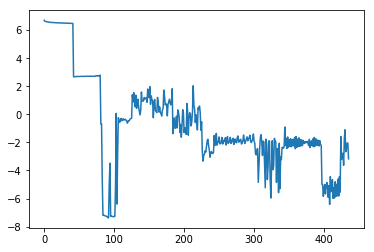

In [32]:
fig,ax=plt.subplots()
j=np.argwhere(np.array(feature_names)=='ankle_a16_y_mean')[0,0]
ax.plot(validdata2[:,j])

In [33]:
from sklearn import tree
from sklearn.externals.six import StringIO
import pydotplus   #using pydotplus in windows10, python 3.6.X
dot_data = StringIO()

tree.export_graphviz(cls, out_file=dot_data, 
                         feature_names=feature_names,  
                         class_names=class_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("treeloso.pdf")

True